In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap5
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import importlib
from d2l.classification.model import MLPClassifierDropout, MLPClassifierDropoutTorch
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.optimizer import SGDOptimizer
from d2l.base.plot import plot_loss, show_images, plot_losses
from d2l.base.utils import mps
from typing import List
from matplotlib import pyplot as plt
import torch
import numpy as np

In [3]:
rng = torch .random.manual_seed(42)

In [4]:
data = FashionMNISTDataset()

In [5]:
mlp_dropout = MLPClassifierDropout(
    num_features=784,
    num_outputs=10, 
    num_hiddens=[256, 256],
    dropouts=[0.2, 0.5],
    rng=rng
)
mlp_dropout_torch = MLPClassifierDropoutTorch(
    num_features=784,
    num_outputs=10, 
    num_hiddens=[256, 256],
    dropouts=[0.2, 0.5],
    rng=rng
)

In [6]:
def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = ClassificationEvaluator(model)
    loss = evaluator.loss(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')
    accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation accuracy {accuracy:.4f}')

Epoch 0, validation loss 0.6699
Epoch 0, validation accuracy 0.7624
Epoch 1, validation loss 0.6928
Epoch 1, validation accuracy 0.7465
Epoch 2, validation loss 0.6715
Epoch 2, validation accuracy 0.7668
Epoch 3, validation loss 0.4473
Epoch 3, validation accuracy 0.8320
Epoch 4, validation loss 0.4159
Epoch 4, validation accuracy 0.8454
Epoch 5, validation loss 0.3941
Epoch 5, validation accuracy 0.8536
Epoch 6, validation loss 0.4086
Epoch 6, validation accuracy 0.8424
Epoch 7, validation loss 0.3687
Epoch 7, validation accuracy 0.8637
Epoch 8, validation loss 0.3982
Epoch 8, validation accuracy 0.8542
Epoch 9, validation loss 0.3651
Epoch 9, validation accuracy 0.8689
Epoch 0, validation loss 0.7072
Epoch 0, validation accuracy 0.7188
Epoch 1, validation loss 0.5764
Epoch 1, validation accuracy 0.7854
Epoch 2, validation loss 0.5198
Epoch 2, validation accuracy 0.8088
Epoch 3, validation loss 0.4319
Epoch 3, validation accuracy 0.8405
Epoch 4, validation loss 0.4180
Epoch 4, validat

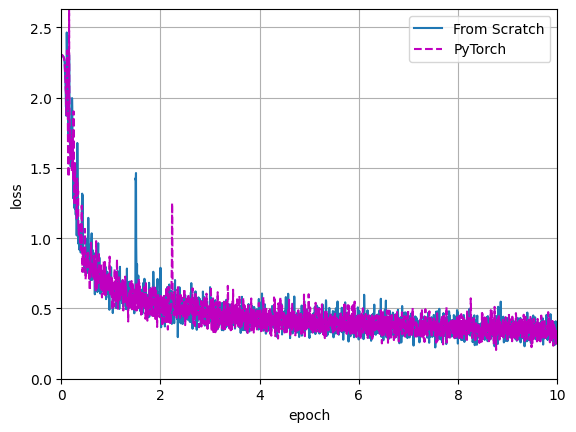

In [7]:
trainer = Trainer(
    model=mlp_dropout,
    optimizer=SGDOptimizer(params=mlp_dropout.parameters(), lr=0.5),
    on_train_epoch_end=eval_on_epoch
)
trainer_torch = Trainer(
    model=mlp_dropout_torch,
    optimizer=torch.optim.SGD(params=mlp_dropout_torch.parameters(), lr=0.5),
    on_train_epoch_end=eval_on_epoch
)

epoch_losses = trainer.train(
    data.get_train_dataloader_epochs(batch_size=256, epochs=10)
)

epoch_losses_torch = trainer_torch.train(
    data.get_train_dataloader_epochs(batch_size=256, epochs=10)
)

fig, ax = plt.subplots()
plot_losses(ax, [epoch_losses, epoch_losses_torch], labels=['From Scratch', 'PyTorch'])

In [8]:
evaluator = ClassificationEvaluator(mlp_dropout)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

evaluator_scratch = ClassificationEvaluator(mlp_dropout_torch)
test_loss_scratch = evaluator_scratch.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss (scratch): {test_loss_scratch:.4f}')
accuracy_scratch = evaluator_scratch.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy (scratch): {accuracy_scratch:.2%}')

Test loss: 0.3651
Test accuracy: 86.89%
Test loss (scratch): 0.3694
Test accuracy (scratch): 86.01%
